### Metody numeryczne 1 - Lista 7

#### Zadanie 1:

Rozwiąż równanie różniczkowe

$$\frac{dy}{dt}=\sin(ty)$$

dla $y(0) =$ 2, 2.5, 3 i 3.5. Wykreśl rozwiązania dla $0\leq t\leq 6$
#### Rozwiązanie:

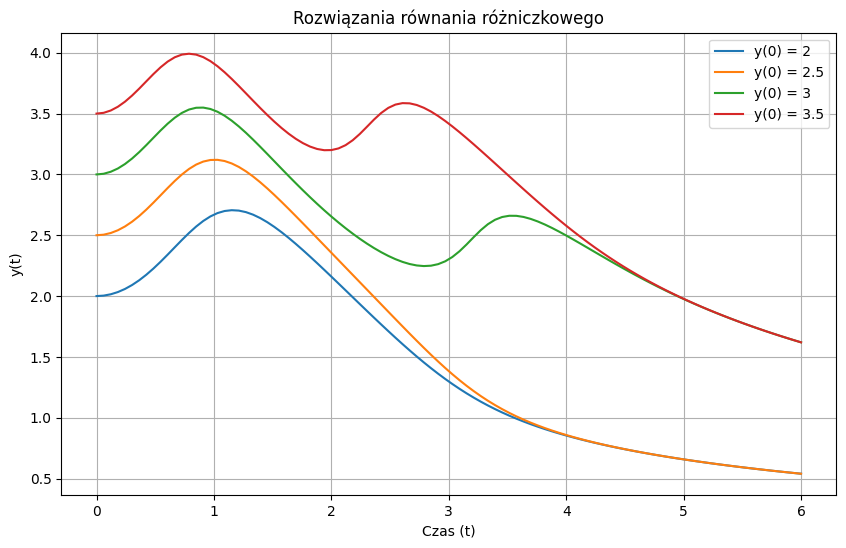

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definicja funkcji opisującej równanie różniczkowe
def model(y, t):
    dydt = np.sin(t * y)
    return dydt

# Warunki początkowe
warunki_poczatkowe = [2, 2.5, 3, 3.5]

# Czas całkowania
t = np.linspace(0, 6, 100)

# Wykreślenie rozwiązań dla różnych warunków początkowych
plt.figure(figsize=(10, 6))

for y0 in warunki_poczatkowe:
    y = odeint(model, y0, t)
    plt.plot(t, y, label=f'y(0) = {y0}')

plt.title('Rozwiązania równania różniczkowego')
plt.xlabel('Czas (t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()


#### Zadanie 2:

Równanie ruchu wahadła matematycznego z tłumieniem oraz okresową siłą wymuszającą można przedstawić w postaci

$$\frac{d^2\theta}{d\tau^2}+\frac{1}{Q}\frac{d\theta}{d\tau}+\sin\theta=A\cos(\tau\bar{\omega})$$

gdzie $\omega_0=\sqrt{\frac{g}{l}}$, $\tau=\omega_0t$ i $\bar{\omega}=\frac{\omega}{\omega_0}\,$.

Rozwiąż to równanie funkcją *scipy.integrate.solv_ivp()* dla:

- $Q=2$, $\bar{\omega}=2/3$, $A=0.5$, $\dot{\theta}_0=0$, $\theta_0=0.01$;
- $Q=2$, $\bar{\omega}=2/3$, $A=0.5$, $\dot{\theta}_0=0$, $\theta_0=0.3$;
- $Q=2$, $\bar{\omega}=2/3$, $A=1.35$, $\dot{\theta}_0=0$, $\theta_0=0.3$;

Przedstaw na wykresach 
- zależności $\theta(t)$
- trajektorie w przestrzeni fazowej $(\dot{\theta},\theta)$

#### Rozwiązanie:

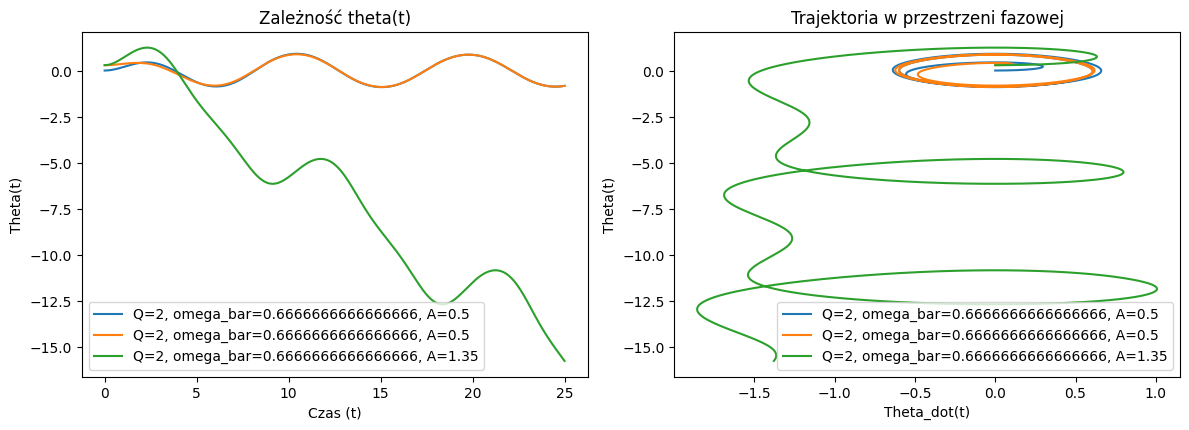

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Funkcja opisująca równanie różniczkowe
def model(t, z, Q, omega_bar, A):
    theta, theta_dot = z
    omega_0 = 1  # Ustalamy arbitralnie, bo nie podano konkretnych wartości dla g i l

    dtheta_dt = theta_dot
    dtheta_dot_dt = -1/Q * theta_dot - np.sin(theta) + A * np.cos(omega_bar * t)

    return [dtheta_dt, dtheta_dot_dt]

# Parametry dla trzech przypadków
parametry = [
    (2, 2/3, 0.5, 0, 0.01),
    (2, 2/3, 0.5, 0, 0.3),
    (2, 2/3, 1.35, 0, 0.3)
]

# Czas całkowania
t_span = (0, 25)
t_eval = np.linspace(*t_span, 1000)

# Wykreślenie rozwiązań dla każdego przypadku
plt.figure(figsize=(12, 8))

for Q, omega_bar, A, theta_dot_0, theta_0 in parametry:
    # Rozwiązanie równania różniczkowego
    rozwiazanie = solve_ivp(
        model,
        t_span,
        [theta_0, theta_dot_0],
        args=(Q, omega_bar, A),
        t_eval=t_eval
    )

    # Wykres zależności theta(t)
    plt.subplot(2, 2, 1)
    plt.plot(rozwiazanie.t, rozwiazanie.y[0], label=f'Q={Q}, omega_bar={omega_bar}, A={A}')

    # Wykres trajektorii w przestrzeni fazowej
    plt.subplot(2, 2, 2)
    plt.plot(rozwiazanie.y[1], rozwiazanie.y[0], label=f'Q={Q}, omega_bar={omega_bar}, A={A}')

# Ustawienia wykresów
plt.subplot(2, 2, 1)
plt.title('Zależność theta(t)')
plt.xlabel('Czas (t)')
plt.ylabel('Theta(t)')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Trajektoria w przestrzeni fazowej')
plt.xlabel('Theta_dot(t)')
plt.ylabel('Theta(t)')
plt.legend()

plt.tight_layout()
plt.show()


#### Zadanie 3:

Znajdź trajektorię piłki rzuconej ukośnie do powierzchni Ziemi

1. zaniedbując opory powietrza,

2. uwzględniając opory powietrza.

W drugim przypadku załóż, że siła oporu powietrza jest postaci

$$\vec{F}=-\frac{1}{2}c_w\rho A\vec{v}|\vec{v}|\,,$$

gdzie

- $c_w\approx 0.35$ - współczynnik oporu powietrza,
- $\rho\approx 1.2\,$kg/m$^3$ - gęstosć powietrza,
- $A[$m$^2]$ - pole przekroju poprzecznego piłki
- $\vec{v}$ - prędkość piłki

Obliczenia przeprowadź dla różnych wielkości piłki, prędkości początkowych i kątów rzutu. Wyniki przedstaw na wykresie

#### Rozwiązanie:

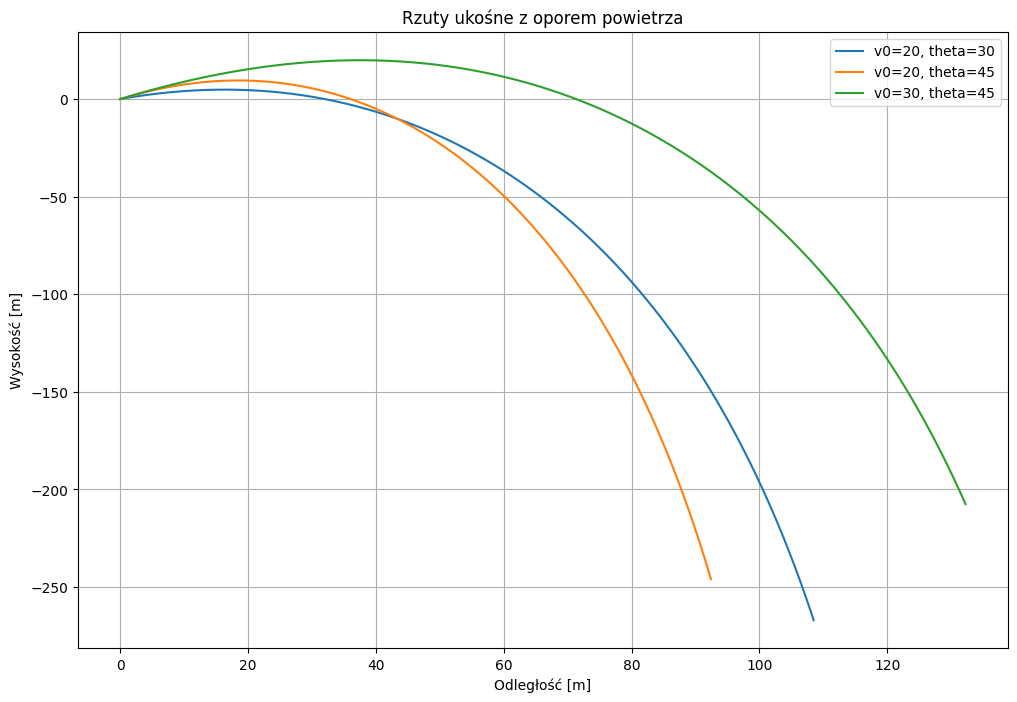

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(y, t, g, cw, rho, A):
    # y to wektor [x, y, vx, vy]
    x, y, vx, vy = y
    v = np.sqrt(vx**2 + vy**2)
    
    # Równania ruchu z oporem powietrza
    dxdt = vx
    dydt = vy
    dvxdt = -cw * rho * A * vx * v
    dvydt = -g - cw * rho * A * vy * v
    
    return [dxdt, dydt, dvxdt, dvydt]

def rzut_ukosny(g, cw, rho, A, v0, theta):
    # Przygotowanie warunków początkowych
    vx0 = v0 * np.cos(np.radians(theta))
    vy0 = v0 * np.sin(np.radians(theta))
    y0 = [0, 0, vx0, vy0]
    
    # Czas całkowania
    t_span = (0, 10)
    t_eval = np.linspace(*t_span, 1000)
    
    # Rozwiązanie równań ruchu
    sol = odeint(model, y0, t_eval, args=(g, cw, rho, A))
    
    return sol

# Parametry symulacji
przyspieszenie_grawitacyjne = 9.81  # przyspieszenie grawitacyjne [m/s^2]
wspolczynnik_oporu_powietrza = 0.35  # współczynnik oporu powietrza [-]
gestosc_powietrza = 1.2  # gęstość powietrza [kg/m^3]
pole_przekroju_poprzecznego = 0.01  # pole przekroju poprzecznego piłki [m^2]

# Przykładowe rzuty ukośne
predkosci_poczatkowe = [20, 20, 30]  # prędkości początkowe [m/s]
katy_rzutu = [30, 45, 45]  # kąty rzutu [stopnie]

# Wykresy trajektorii
plt.figure(figsize=(12, 8))

for v0, theta in zip(predkosci_poczatkowe, katy_rzutu):
    sol = rzut_ukosny(przyspieszenie_grawitacyjne, wspolczynnik_oporu_powietrza, gestosc_powietrza, pole_przekroju_poprzecznego, v0, theta)
    plt.plot(sol[:, 0], sol[:, 1], label=f'v0={v0}, theta={theta}')

plt.title('Rzuty ukośne z oporem powietrza')
plt.xlabel('Odległość [m]')
plt.ylabel('Wysokość [m]')
plt.legend()
plt.grid(True)
plt.show()


#### Zadanie 4:

Rozwiąż metodą strzałów równanie różniczkowe

$$\frac{d^2y}{dt^2}+\sin(y)+1=0$$

z następującymi warunkami brzegowymi $y(0) = 0$ i $y(\pi)=0$.


#### Rozwiązanie:

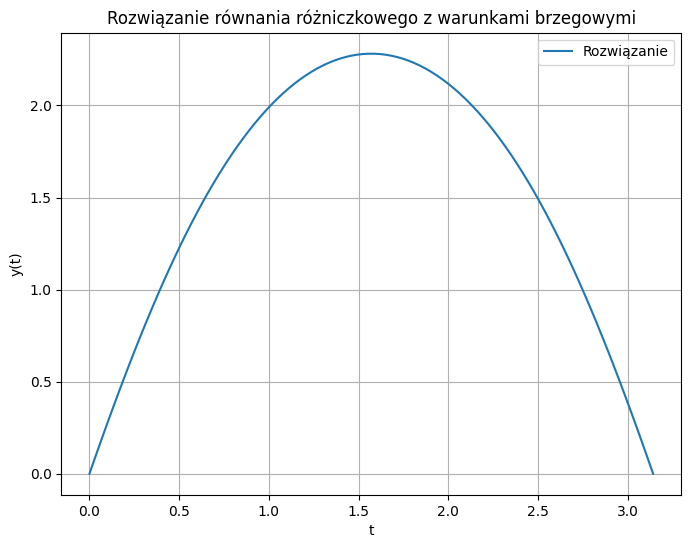

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton

# Funkcja opisująca równanie różniczkowe
def model(y, t):
    dydt = [y[1], -np.sin(y[0]) - 1]
    return dydt

# Warunki brzegowe
y0_lewy = 0
y0_prawy = 0
t_span = [0, np.pi]

# Metoda strzałów
def rozwiaz_bvp(przyblizenie):
    y0 = [y0_lewy, przyblizenie]
    sol = odeint(model, y0, np.linspace(*t_span, 100))
    return sol[-1, 0] - y0_prawy

# Rozwiązanie równania za pomocą metody strzałów
przyblizenie_poczatkowe = 0.5
przyblizenie_koncowe = newton(rozwiaz_bvp, przyblizenie_poczatkowe)

# Ponowne rozwiązanie z ostatecznym przybliżeniem
y0_koncowe = [y0_lewy, przyblizenie_koncowe]
sol_koncowe = odeint(model, y0_koncowe, np.linspace(*t_span, 100))

# Wykres wyniku
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(*t_span, 100), sol_koncowe[:, 0], label='Rozwiązanie')
plt.title('Rozwiązanie równania różniczkowego z warunkami brzegowymi')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()
